<h1><center> #00002: How to Make Your Own Neural Network</center></h1>

Made with the help of examples from [Make Your Own Neural Network by Tariq Rashid](https://www.goodreads.com/book/show/29746976-make-your-own-neural-network) his code examples can be found on [his github](https://github.com/makeyourownneuralnetwork/makeyourownneuralnetwork)
<br>
Using the MNIST dataset of handwritten digits. Links to data used: [Full Training Data](http://www.pjreddie.com/media/files/mnist_train.csv), [Training Data 100 entries](https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv), [Full Testing Data](http://www.pjreddie.com/media/files/mnist_test.csv),
 and [Full Testing Data 10 entries](https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv)

<br>
This will be a notebook for me to explore all the workings on a basic neural network system from development to training to use, and visualization of learned features.

In [39]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
class NerualNetwork:
    
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes

        #Matrix of hiddenNodes x InputNodes, H rows, I col 
        self.whi = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) #(numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        #Matrix of outputNodes x hiddenNodes, O rows, H col 
        self.ohw = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) #(numpy.random.rand(self.onodes, self.hnodes) - 0.5) 
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        # activation function for back query is the logit function
        self.inverse_activation_function = lambda x: scipy.special.logit(x)
        #rate at which network with adjust weights during training phase
        self.lr = learningRate
        

    def train(self,input_list,target_list):
        # convert inputs list to 2d array
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        #print(inputs)
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.whi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.ohw, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        
         # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = np.dot(self.ohw.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.ohw += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        #print("Matrix of outputNodes x hiddenNodes rows: {} col : {}, array shape: {} \n {}".format(self.onodes,self.hnodes,self.ohw.shape, self.ohw)) #debug
        # update the weights for the links between the input and hidden layers
        self.whi += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        #print("Matrix of hiddenNodes x InputNodes, {} rows, {} col: {}, array shape: {}".format(self.hnodes,self.inodes,self.whi.shape,self.whi)) #debug

    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        #print(inputs)
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.whi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.ohw, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

    # backquery the neural network
    # we'll use the same termnimology to each item, 
    # eg target are the values at the right of the network, albeit used as input
    # eg hidden_output is the signal to the right of the middle nodes
    def backquery(self, targets_list):
        # transpose the targets list to a vertical array
        final_outputs = np.array(targets_list, ndmin=2).T

        # calculate the signal into the final output layer
        final_inputs = self.inverse_activation_function(final_outputs)

        # calculate the signal out of the hidden layer
        hidden_outputs = np.dot(self.ohw.T, final_inputs)
        # scale them back to 0.01 to .99
        hidden_outputs -= np.min(hidden_outputs)
        hidden_outputs /= np.max(hidden_outputs)
        hidden_outputs *= 0.98
        hidden_outputs += 0.01

        # calculate the signal into the hidden layer
        hidden_inputs = self.inverse_activation_function(hidden_outputs)

        # calculate the signal out of the input layer
        inputs = np.dot(self.whi.T, hidden_inputs)
        # scale them back to 0.01 to .99
        inputs -= np.min(inputs)
        inputs /= np.max(inputs)
        inputs *= 0.98
        inputs += 0.01

        return inputs

<h1><center>Class NerualNetwork __init__</center></h1>

<br>
<h2><center>self.inodes</center></h2>

self.inodes is a [Column Matrix](http://chortle.ccsu.edu/vectorlessons/vch01/vch01_6.html) of inputNodes x 1. 

\begin{equation*}
\mathbf{self.indoes}=
\begin{bmatrix}
{inputNode_1}
\\ \vdots & \\ 
{inputNode_n}
\end{bmatrix}
\end{equation*}

<br>
<br>
<br>

<h2><center>self.hnodes</center></h2>

self.hnodes is a [Column Matrix](http://chortle.ccsu.edu/vectorlessons/vch01/vch01_6.html) of hiddenNodes x 1. 

\begin{equation*}
\mathbf{self.hnodes}=
\begin{bmatrix}
{hiddenNodes_1}
\\ \vdots & \\ 
{hiddenNodes_n}
\end{bmatrix}
\end{equation*}

<br>
<br>
<br>

<h2><center>self.onodes</center></h2>

self.onodes is a [Column Matrix](http://chortle.ccsu.edu/vectorlessons/vch01/vch01_6.html) of outputNodes x 1. 

\begin{equation*}
\mathbf{self.onodes}=
\begin{bmatrix}
{outputNodes_1}
\\ \vdots & \\ 
{outputNodes_n}
\end{bmatrix}
\end{equation*}

<br>
<br>
<br>

<h2><center>self.whi</center></h2>

self.whi is a matrix of weights from each InputNode to HiddenNode which represent a set of connection in the network of hiddenNodes(H) x InputNodes(I), H rows, I col. 

\begin{equation*}
\mathbf{self.whi}=
\begin{bmatrix}
{Weight_{11}}  & \cdots & {Weight_{1I}}
\\ \vdots & \ddots & \vdots \\
{Weight_{H1}} & \cdots & {Weight_{HI}}
\end{bmatrix}
\end{equation*}
<br>
<br>
${Weight_{11}}$  for example would represent the connection between InputNodes 1 and HiddenNode 1


<br>
<br>
<br>

<h2><center>self.ohw</center></h2>

self.ohw is a matrix of weights from each Hidden Node to output node which represent a set of connection in the network of size outputNodes(O) x hiddenNodes(H), O rows, H col 

\begin{equation*}
\mathbf{self.ohw}=
\begin{bmatrix}
{Weight_{11}}  & \cdots & {Weight_{1H}}
\\ \vdots & \ddots & \vdots \\
{Weight_{O1}} & \cdots & {Weight_{OH}}
\end{bmatrix}
\end{equation*}
<br>
<br>
${Weight_{11}}$ for example would represent the connection between HiddenNode 1 and OutputNode 1


<h2><center>self.activation_function </center></h2>
        
The [Activation Function](https://en.wikipedia.org/wiki/Activation_function) is a function that determains the output of a node based on its input in this case the [scipy.special.expit(x)](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.expit.html) which is a version of the [logistic function](https://en.wikipedia.org/wiki/Logistic_function) 
\begin{equation*}
f(x)   = \frac{1}{1 + e^{-x}}
\end{equation*}


<h2><center>self.inverse_activation_function </center></h2>
        
This is an [Activation Function](https://en.wikipedia.org/wiki/Activation_function) that is used in backquery because the network information flows backwards the inputs are scaled differently and we use a different activation function in this case the [scipy.special.logit(x)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logit.html) which is a version of the [Logit function](https://en.wikipedia.org/wiki/Logit) 
\begin{equation*}
f(x)   = log(\frac{x}{1 - x})
\end{equation*}

<h2><center>self.lr</center></h2>
This is the "learning rate" of the network which represents the step size that the network will take during the training phase. It represents how quickly values in the weight matrices self.ohw and self.whi will be adjusted.

In [41]:
inputNodes = 3
hiddenNodes = 3
outputNodes = 3

learningRate = 0.3
#small test network
NN = NerualNetwork(inputNodes,hiddenNodes,outputNodes,learningRate)

An Example of weight matrices self.whi and self.ohw

In [42]:
print("Input Nodes: {} , Hidden Nodes: {}, Output Nodes: {} , Learning Rate: {} \n".format(NN.inodes,NN.hnodes,NN.onodes,NN.lr)) #e
print("Input to Hidden Connection Matrix: \n {} \n\n Hidden to Output Connection Matrix: \n {}".format(NN.whi,NN.ohw)) 

Input Nodes: 3 , Hidden Nodes: 3, Output Nodes: 3 , Learning Rate: 0.3 

Input to Hidden Connection Matrix: 
 [[ 0.19158074 -0.95319794  0.38928676]
 [-0.08451402  0.14372238 -0.24082296]
 [ 0.22036279  1.35468255 -0.05018339]] 

 Hidden to Output Connection Matrix: 
 [[-0.27269384 -0.09883736  0.43848137]
 [-0.22309283 -0.08530686 -0.40576622]
 [ 0.44334264  0.08868493  0.26248021]]


In [43]:
NN.query([1,2,3])

array([[0.56857112],
       [0.37856567],
       [0.60890893]])

In [44]:
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_train_100.csv",'r')
mnist_train_100 = data_file.readlines()
data_file.close()

In [45]:
len(mnist_train_100)

100

In [46]:
#Create the graph of the index from the dataset to visualize data
def createGraph(index,image_array):
    all_nums = list()
    all_labels = list()
    all_labels = image_array[index][0]
    image_array = image_array[index].split(',')
    for i in image_array:
        all_nums.append(i)
    #print('label: {}'.format(all_labels[index]))
    #print('all_nums[{}] : {}'.format(index,all_nums[index]))
    #debugprint('type of all_nums[{}] : \n {}'.format(index,type(all_nums[index]))) #debug
    image_array = np.asfarray(all_nums[1:]).reshape((28,28))
    print("label: {}".format(all_labels[0]))
    #print(image_array) #debug
    plt.imshow(image_array,cmap='Greys',interpolation='None')
    
#Create the graph of the index from the dataset to visualize data
def createGraphNomalized(index,image_array, normalized_labels):
    showarray = image_array[index].reshape((28,28))
    print("label: {}".format(normalized_labels[index]))
    plt.imshow(showarray,cmap='Greys',interpolation='None')    

#Normalization is to map input ranges to ranges of activation function of nodes.
def normalizeData(data_list):
    scaled_input = [None] * len(data_list)
    scaled_input_labels = [None] * len(data_list)
    for x in range(len(data_list)):
        scaled_input[x] = list()
        for y in data_list[x]:
            #print("Data_list[{}] /n {}".format(x,data_list[x])) #debug
            all_values = data_list[x].split(',')
            scaled_input_labels[x] = all_values[0]
            scaled_input[x] = (np.asfarray(all_values[1:]) / 255 * 0.99 ) +0.01 
            #print("scaled_input[{}] /n {}".format(x,scaled_input[x])) #debug
    return scaled_input, scaled_input_labels

def normalizeData2(data_list):
    scaled_input = [None] * len(data_list)
    scaled_input_labels = [None] * len(data_list)
    for x in range(len(data_list)):
        scaled_input[x] = list()
        #print("scaled_input: {}".format(data_list[x]))
        all_values = data_list[x].split(',')
        scaled_input_labels[x] = all_values[0]
        scaled_input[x] = (np.asfarray(all_values[1:]) / 255 * 0.99 ) +0.01 
        #print("scaled_input[{}] /n {}".format(x,scaled_input[x])) #debug
    return scaled_input, scaled_input_labels

label: 4


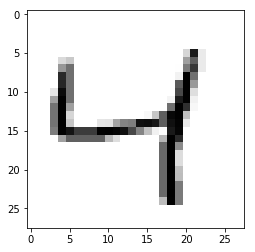

In [47]:
createGraph(2,mnist_train_100) #image with raw values matrix of 28x28 range of 0 - 255 to rep darkness of each pixel 

<h1><center>Image matrix</center></h1>


\begin{equation*}
\mathbf{imageMatrix}=
\begin{bmatrix}
{Weight_{1-1}}  & \cdots & {Weight_{1-{28}}}
\\ \vdots & \ddots & \vdots \\
{Weight_{28-1}} & \cdots & {Weight_{28-28}}
\end{bmatrix}
\end{equation*}

In [48]:
normalized,normalized_labels = normalizeData2(mnist_train_100)

label: 5


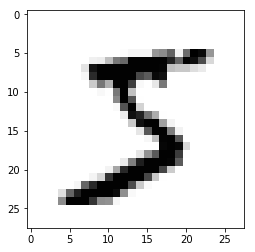

In [49]:
createGraphNomalized(0,normalized,normalized_labels) #visualising the number and its label

In [50]:
inputNodes = 784 #each pixel will be used as an input the image is 28*28=784 pixels
hiddenNodes = 100 #value much more aribrary and I will try experimenting with it
outputNodes = 10 #can label a number from 0-9 hence 10 output nodes

learningRate = 0.3

MNISTNN = NerualNetwork(inputNodes,hiddenNodes,outputNodes,learningRate)

In [51]:
for x in range(len(normalized)): #tranining the network on the normalized data with loop
    targets = np.zeros(outputNodes) + 0.01 #creating output array for number 0-9
    inputs = normalized[x] #selecting array of 784 pixels for input
    targets[int(normalized_labels[x])] = 0.99 #setting correct output array configuration 
    MNISTNN.train(inputs,targets) #training on 1 entry 

In [52]:
#testing data
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_test_10.csv",'r')
mnist_test_10 = data_file.readlines()
data_file.close()

In [53]:
normalized_test,normalized_labels_test = normalizeData2(mnist_test_10)

label: 1


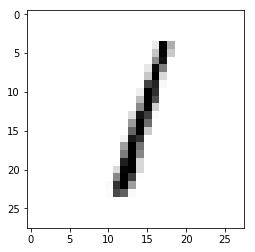

In [54]:
createGraphNomalized(2,normalized_test,normalized_labels_test)

In [55]:
def printQuery(result_array):
    best_answer = 0
    for i in range(len(result_array)):
        print("{} : {} %".format(i,result_array[i][0] * 100))
    print("Best Guess: {}".format(np.argmax(result_array)))

In [56]:
printQuery(MNISTNN.query(normalized_test[2]))

0 : 2.7583190842944383 %
1 : 92.18140996816511 %
2 : 2.4373024383345947 %
3 : 6.950911052531433 %
4 : 0.8370945024435367 %
5 : 5.4078397632264315 %
6 : 3.42200966015103 %
7 : 4.820383892277145 %
8 : 6.7440101702845885 %
9 : 0.4819837886753937 %
Best Guess: 1


In [57]:
def trackResults(epochs, test_array, label_array,NN):
    scorecard = []
    print("No of examples: {}".format(len(test_array)))
    for e in range(epochs):
        for i in range(len(test_array)):
            correct_label = int(label_array[i])
            #print("loop: {}".format(i))
            #print("correct label: {}".format(correct_label))
            outputs = NN.query(test_array[i])
            label = np.argmax(outputs)
            #print("Network answer: {} \n".format(label))
            if(label == correct_label):
                scorecard.append(1)
            else:
                scorecard.append(0)
    scorecard_array = np.asarray(scorecard)
    print("performance = {} % over {} epochs".format(scorecard_array.sum() / scorecard_array.size * 100,epochs))

In [58]:
trackResults(2, normalized_test,normalized_labels_test,MNISTNN)

No of examples: 10
performance = 60.0 % over 2 epochs


In [59]:
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_train.csv",'r')
mnist_train_full = data_file.readlines()
data_file.close()

In [60]:
data_file = open(r"/home/tomi/data/howToMakeANN/mnist_test.csv",'r')
mnist_test_full = data_file.readlines()
data_file.close()

label: 5


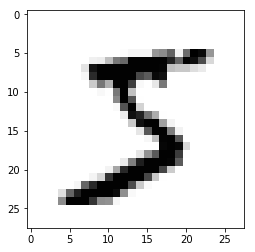

In [61]:
createGraph(0,mnist_train_full)

In [62]:
normalized_full_train,normalized_full_train_labels = normalizeData2(mnist_train_full)

label: 5


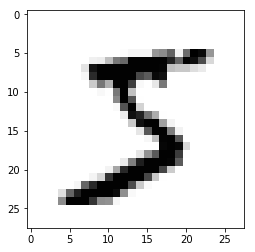

In [63]:
createGraphNomalized(0,normalized_full_train,normalized_full_train_labels)

In [64]:
for x in range(len(normalized_full_train)): #tranining the network on the normalized data with loop
    targets = np.zeros(outputNodes) + 0.01 #creating output array for number 0-9
    inputs = normalized_full_train[x] #selecting array of 784 pixels for input
    targets[int(normalized_full_train_labels[x])] = 0.99 #setting correct output array configuration 
    MNISTNN.train(inputs,targets) #training on 1 entry 

In [65]:
trackResults(2, normalized_test,normalized_labels_test,MNISTNN)

No of examples: 10
performance = 100.0 % over 2 epochs


In [66]:
data_file = open("/home/tomi/data/howToMakeANN/mnist_train.csv", 'r')
data_train_full = data_file.readlines()
data_file.close

<function TextIOWrapper.close()>

In [67]:
normalized_full_test, normalized_full_test_labels = normalizeData2(mnist_test_full)

label: 1


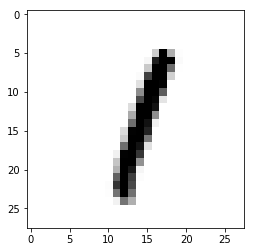

In [68]:
createGraphNomalized(5, normalized_full_test,normalized_full_test_labels)

In [69]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNISTNN)

No of examples: 10000
performance = 94.55 % over 2 epochs


In [70]:
def trainNetwork(NNet, epochs, training_data_set, tranining_data_set):# train the neural network
    training_data_set_len = len(training_data_set)
    for e in range(epochs):
        print("Epoch: {}".format(e))
        for x in range(training_data_set_len): #tranining the network on the normalized data with loop
            targets = np.zeros(outputNodes) + 0.01 #creating output array for number 0-9
            inputs = training_data_set[x] #selecting array of 784 pixels for input
            targets[int(tranining_data_set[x])] = 0.99 #setting correct output array configuration 
            NNet.train(inputs,targets) #training on 1 entry 
            #print("{}/{} {:10.2f} %".format(x,training_data_set_len,x/training_data_set_len * 100))

In [71]:
trainNetwork(MNISTNN,1,normalized_full_train,normalized_full_train_labels)

Epoch: 0


[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]


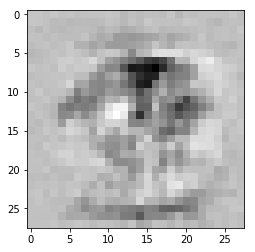

In [72]:
# run the network backwards, given a label, see what image it produces

# label to test
label = 9
# create the output signals for this label
targets = np.zeros(outputNodes) + 0.01
# all_values[0] is the target label for this record
targets[label] = 0.99
print(targets)

# get image data
image_data = MNISTNN.backquery(targets)

# plot image data
plt.imshow(image_data.reshape(28,28), cmap='Greys', interpolation='None')

In [73]:
#mutiple test changing hiddenNodes
MNIST_30_hidden = NerualNetwork(hiddenNodes=30,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_50_hidden = NerualNetwork(hiddenNodes=50,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_80_hidden = NerualNetwork(hiddenNodes=80,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_150_hidden = NerualNetwork(hiddenNodes=150,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_250_hidden = NerualNetwork(hiddenNodes=250,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_500_hidden = NerualNetwork(hiddenNodes=500,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_1000_hidden = NerualNetwork(hiddenNodes=1000,inputNodes=784,outputNodes=10,learningRate=0.3)

#mutiple test changing learningrate using 100 nodes with known 95% test rate trained @2 epcohes
MNIST_1_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.1)
MNIST_2_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.2)
MNIST_3_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.3)
MNIST_4_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.4)
MNIST_5_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.5)
MNIST_6_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.6)
MNIST_7_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.7)
MNIST_8_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.8)
MNIST_9_learning = NerualNetwork(hiddenNodes=100,inputNodes=784,outputNodes=10,learningRate=0.9)

In [74]:
#training all networks with full 60,000 traning data at 2 epcohes
trainNetwork(MNIST_30_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_50_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_80_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_150_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_250_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_500_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_1000_hidden,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_1_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_2_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_3_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_4_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_5_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_6_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_7_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_8_learning,1,normalized_full_train,normalized_full_train_labels)
trainNetwork(MNIST_9_learning,1,normalized_full_train,normalized_full_train_labels)

Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0
Epoch: 0


In [75]:
trackResults(2, normalized_test,normalized_labels_test,MNIST_30_hidden)

No of examples: 10
performance = 90.0 % over 2 epochs


In [76]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_50_hidden)

No of examples: 10
performance = 100.0 % over 2 epochs


In [77]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_80_hidden)

No of examples: 10
performance = 100.0 % over 2 epochs


In [78]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_150_hidden)

No of examples: 10
performance = 100.0 % over 2 epochs


In [79]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_250_hidden)

No of examples: 10
performance = 100.0 % over 2 epochs


In [80]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_500_hidden)

No of examples: 10
performance = 100.0 % over 2 epochs


In [81]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_1000_hidden)

No of examples: 10
performance = 100.0 % over 2 epochs


In [82]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_1_learning)

No of examples: 10
performance = 100.0 % over 2 epochs


In [83]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_2_learning)

No of examples: 10
performance = 100.0 % over 2 epochs


In [84]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_3_learning)

No of examples: 10
performance = 90.0 % over 2 epochs


In [85]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_4_learning)

No of examples: 10
performance = 90.0 % over 2 epochs


In [86]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_5_learning)

No of examples: 10
performance = 100.0 % over 2 epochs


In [87]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_6_learning)

No of examples: 10
performance = 90.0 % over 2 epochs


In [88]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_7_learning)

No of examples: 10
performance = 90.0 % over 2 epochs


In [89]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_8_learning)

No of examples: 10
performance = 90.0 % over 2 epochs


In [90]:
trackResults(2,normalized_test,normalized_labels_test,MNIST_9_learning)

No of examples: 10
performance = 90.0 % over 2 epochs


In [91]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_30_hidden)

No of examples: 10000
performance = 90.57 % over 2 epochs


In [92]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_50_hidden)

No of examples: 10000
performance = 93.26 % over 2 epochs


In [93]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_80_hidden)

No of examples: 10000
performance = 93.93 % over 2 epochs


In [94]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_150_hidden)

No of examples: 10000
performance = 95.35 % over 2 epochs


In [95]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_250_hidden)

No of examples: 10000
performance = 95.53 % over 2 epochs


In [97]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_500_hidden)

No of examples: 10000
performance = 95.30999999999999 % over 2 epochs


In [98]:
trackResults(2,normalized_full_test,normalized_full_test_labels,MNIST_1000_hidden)

No of examples: 10000
performance = 94.69 % over 2 epochs


In [99]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_1_learning)

No of examples: 10000
performance = 95.15 % over 2 epochs


In [100]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_2_learning)

No of examples: 10000
performance = 95.39 % over 2 epochs


In [101]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_3_learning)

No of examples: 10000
performance = 94.17 % over 2 epochs


In [102]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_4_learning)

No of examples: 10000
performance = 93.06 % over 2 epochs


In [103]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_5_learning)

No of examples: 10000
performance = 91.17 % over 2 epochs


In [104]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_6_learning)

No of examples: 10000
performance = 90.39 % over 2 epochs


In [105]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_7_learning)

No of examples: 10000
performance = 89.7 % over 2 epochs


In [106]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_8_learning)

No of examples: 10000
performance = 87.42 % over 2 epochs


In [107]:
trackResults(2, normalized_full_test,normalized_full_test_labels,MNIST_9_learning)

No of examples: 10000
performance = 87.68 % over 2 epochs


Thoughts on results:

For the hidden node tests it seems that from the benchmark of 100 hidden nodes @ 95.49 % using less nodes then 100 redcdes acceuracy and 

Next Steps:
Mutiple training stratoges (more data, vary learning rate and epochs)
Mutiple hidden layers,
Different connection types (i.e self loops),
Different type of data,
Different type of learning Unsupervised or Reinforcement Learning,

Notes on workflow:

NN object add name to be able to batch together train and track results functions
<br>
Make train and track results functions take an array of NNs and print results and perameters(Input,Hidden,Outout Nodes)
<br>
read data in together btach open and close
<br>
add multiple filePath + "filename.csv" to help working across mutiple deivces with same data